In [1]:
from pf2barcode.imports import import_CCLE
from anndata import AnnData
import scanpy as sc
from pf2barcode.nmf import NMF_ANLS_BLOCKPIVOT
import pandas as pd

X = import_CCLE()
X = X[X.obs["SW"] != "unknown"]

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/asm/.cache/pypoetry/virtualenvs/pf2barcode-Hbu_9TGN-py3.12/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/asm/.cache/pypoetry/virtualenvs/pf2barcode-Hbu_9TGN-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
W, H, info = NMF_ANLS_BLOCKPIVOT().run(X.X, 25, max_iter=300)

nmfdata = AnnData(W, obs=X.obs, var=pd.DataFrame(index=[f'NMF{i}' for i in range(1, W.shape[1] + 1)]))
nmfdata.X /= nmfdata.X.mean(axis=1, keepdims=True)

100%|██████████| 299/299 [01:28<00:00,  3.37it/s, rel_error=0.527]


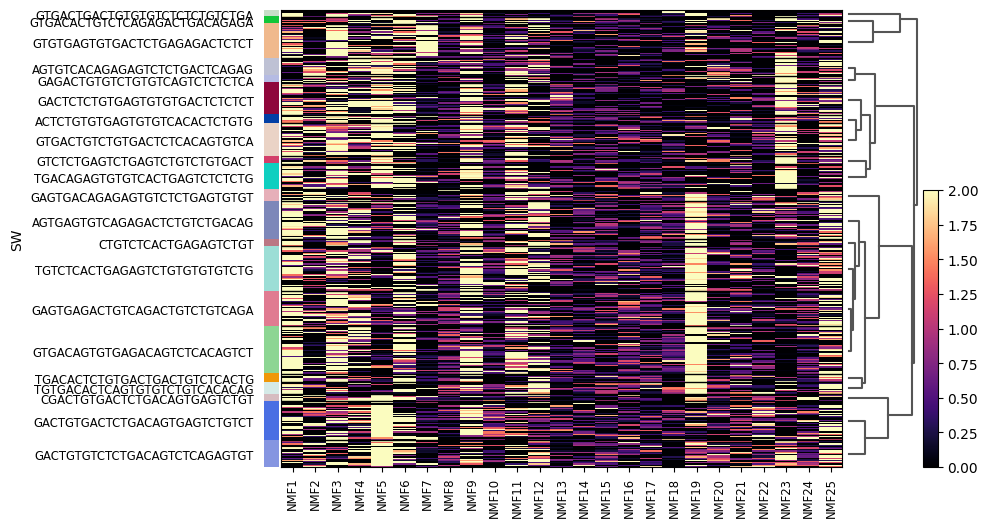

In [3]:
sc.pl.heatmap(nmfdata, nmfdata.var_names, groupby="SW", dendrogram=True, vmax=2.0, cmap="magma")

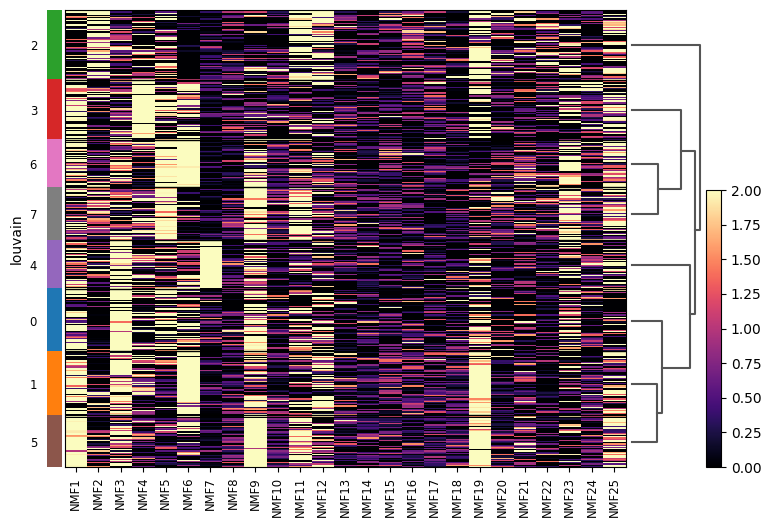

In [8]:
sc.pl.heatmap(nmfdata, nmfdata.var_names, groupby="louvain", dendrogram=True, vmax=2.0, cmap="magma")

2024-05-28 07:51:14,397 [WARNING] Duplicated values found in preranked stats: 23.73% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
/home/asm/.cache/pypoetry/virtualenvs/pf2barcode-Hbu_9TGN-py3.12/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/asm/.cache/pypoetry/virtualenvs/pf2barcode-Hbu_9TGN-py3.12/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to per

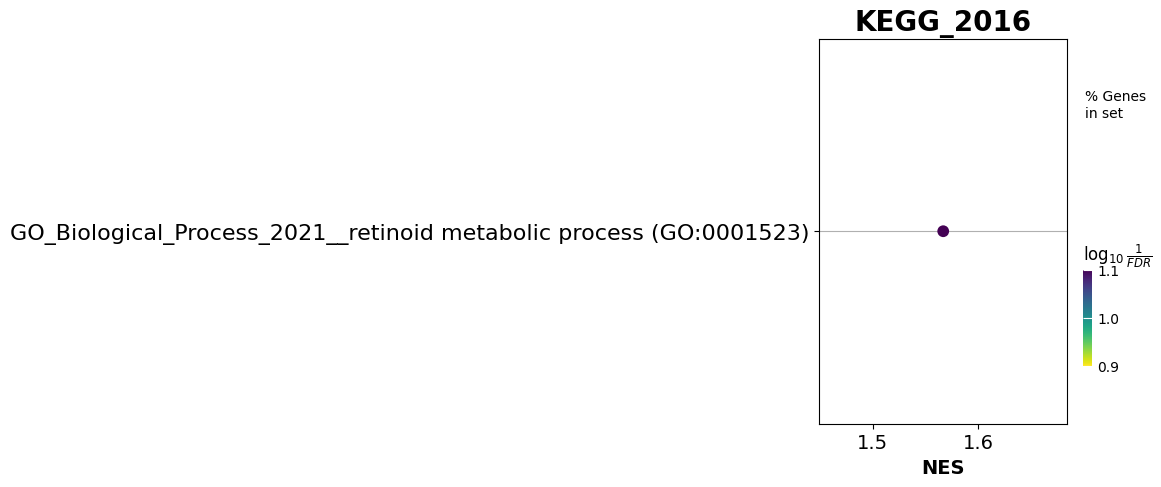

In [67]:
from gseapy import prerank, dotplot

geneSets = [
        "GO_Biological_Process_2021",
        "GO_Cellular_Component_2021",
    ]

df = prerank(
    pd.Series(H[:, 19], index=X.var_names),
    gene_sets=geneSets,
    organism="Human",
    no_plot=True,
    threads=20,
)

dotplot(df.res2d,
        column="FDR q-val",
        title='KEGG_2016',
        size=6, # adjust dot size
        figsize=(4,5), cutoff=0.25, show_ring=False);

In [65]:
df.res2d.loc[df.res2d["FDR q-val"] < 0.1, :]

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes


In [66]:
pd.Series(H[:, 20], index=X.var_names).sort_values(ascending=False).head(20)

IL24         1.799838
G0S2         1.302120
DOCK9        1.298887
LINC00472    1.246791
LINC00973    1.226230
TSC22D1      1.201138
TDRD3        1.190256
IKBKB        1.134144
BOD1L1       1.111739
USP32        1.101820
TUBGCP4      1.095955
STEAP1       1.095634
MIR100HG     1.093479
PPP1R15A     1.077405
PHLDB2       1.076172
LINC01184    1.070697
IL1RAPL1     1.068536
TAOK3        1.065707
SPRY2        1.053896
RASAL2       1.048581
dtype: float64